# Exploring Keys

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

data = h5py.File('nyu_depth_v2_labeled.mat', 'r')

print(f"Keys:")
for key in data.keys():
    print(f"- {key}")

Keys:
- #refs#
- #subsystem#
- accelData
- depths
- images
- instances
- labels
- names
- namesToIds
- rawDepthFilenames
- rawDepths
- rawRgbFilenames
- sceneTypes
- scenes


# Viewing Sample Images

In [4]:
rgb_images = data['images']
depth_maps = data['depths']

# Check the shapes of the data to ensure they loaded correctly
print(f"Shape of Images: {rgb_images.shape}")
print(f"Shape of Depth Map: {depth_maps.shape}")

Shape of Images: (1449, 3, 640, 480)
Shape of Depth Map: (1449, 640, 480)


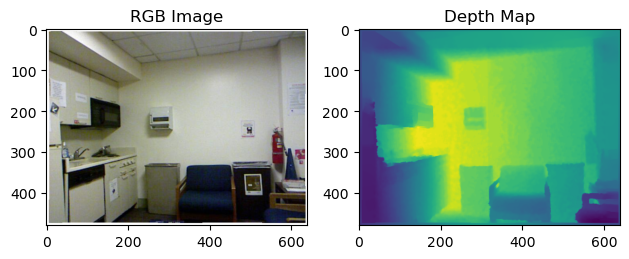

In [5]:
def displayImageAndDepthMap(key = 0):
    sampleImage =   rgb_images[key]
    sampleImage = np.transpose(sampleImage, (1, 2, 0))
    sampleImage = np.rot90(sampleImage, k=-1)
    
    sampleImageDepth =   depth_maps[key]
    sampleImageDepth = np.rot90(sampleImageDepth, k=-1)

    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(sampleImage)
    axs[0].set_title("RGB Image")
    axs[1].imshow(sampleImageDepth)
    axs[1].set_title("Depth Map")

    plt.tight_layout()

displayImageAndDepthMap()

# Exploring rawDepths

Raw Depths: <HDF5 dataset "rawDepths": shape (1449, 640, 480), type "<f4">
Raw Depths shape: (1449, 640, 480)


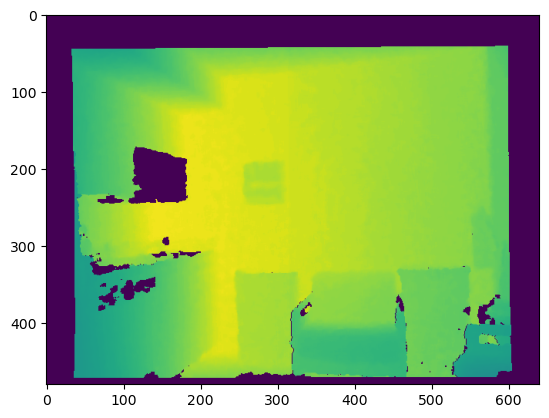

In [6]:
raw_depths = data['rawDepths']
print(f"Raw Depths: {raw_depths}")
print(f"Raw Depths shape: {raw_depths.shape}")

sampleRawDepth = raw_depths[0]
sampleRawDepth = np.rot90(sampleRawDepth, k=-1)

plt.imshow(sampleRawDepth)



In [9]:
import cv2
import numpy as np

# Assuming 'image' is the image you want to save
cv2.imwrite('test_image.jpg', np.rot90(np.transpose(rgb_images[0], (1, 2, 0)), k=-1))
# Normalize depth map to range [0, 255]
normalized_depth_map = cv2.normalize(np.rot90(depth_maps[0], k=-1), None, 0, 255, cv2.NORM_MINMAX)
normalized_depth_map = normalized_depth_map.astype(np.uint8)

# Apply a colormap to the normalized depth map
colored_depth_map = cv2.applyColorMap(normalized_depth_map, cv2.COLORMAP_JET)

# Save the colored depth map
cv2.imwrite('test_image_colored_depth_map.jpg', colored_depth_map)

True